In [1]:
#!git clone https://github.com/JEFworks-Lab/STalign.git

Cloning into 'STalign'...
remote: Enumerating objects: 1612, done.
remote: Total 1612 (delta 0), reused 0 (delta 0), pack-reused 1612 (from 1)
Receiving objects: 100% (1612/1612), 687.65 MiB | 4.04 MiB/s, done.
Resolving deltas: 100% (753/753), done.


In [2]:
#! ls STalign/

LICENSE                 STalign_logos_fin.png   requirements.txt
Pipfile                 _build                  setup.py
README.md               docs
STalign                 pipenv-requirements.txt


In [ ]:
#! pip3 install -e STalign

Obtaining file:///Users/debarpita/Desktop/UGP/trial1/STalign/STalign
ERROR: file:///Users/debarpita/Desktop/UGP/trial1/STalign/STalign does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import torch

# make plots bigger
plt.rcParams["figure.figsize"] = (10,8)

In [14]:
#!gdown -q 1eY1qJ6IXSdr8QRpnon9z0s5vszkpJTBj

In [15]:
#! gdown -q 1xngMtyom2lxclq3yp5WmZC_SAwzX9OeI

In [2]:
fname = 'cellsv1.csv.gz'
df1 = pd.read_csv(fname)
print(df1.head())

      cell_id  x_centroid   y_centroid  transcript_counts  \
0  aaaadcac-1  315.479584  4135.815918                 35   
1  aaaaieak-1  317.920197  4126.272461                 61   
2  aaaanbhm-1  318.433136  4109.978027                292   
3  aaaankfe-1  335.111847  4116.146484                303   
4  aaaankfi-1  341.734100  4125.354980                 32   

   control_probe_counts  genomic_control_counts  control_codeword_counts  \
0                     0                       0                        0   
1                     0                       0                        0   
2                     0                       0                        0   
3                     1                       0                        0   
4                     0                       0                        0   

   unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
0                           0                           0            35   
1                         

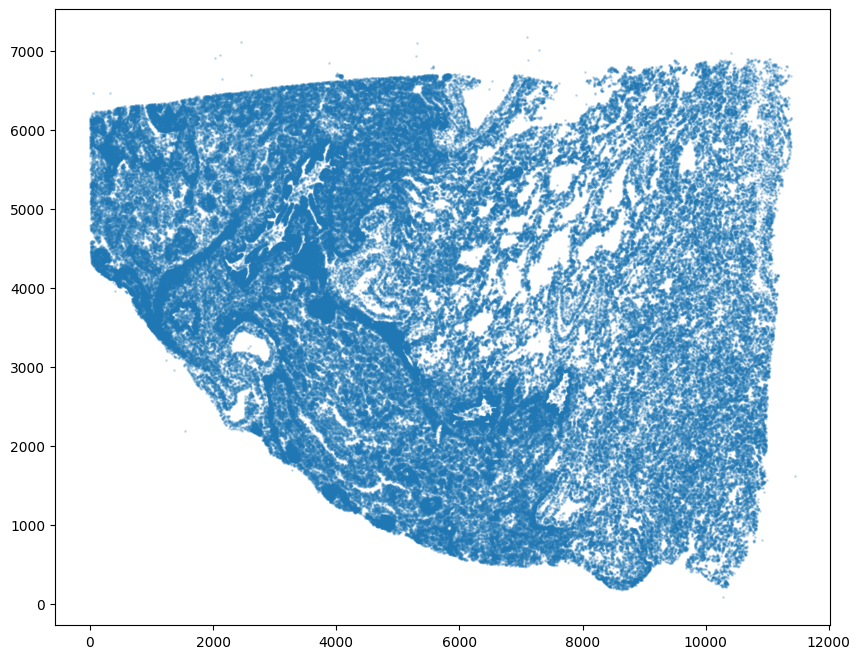

In [3]:
xI = np.array(df1['x_centroid'])
yI = np.array(df1['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2)

In [4]:
import STalign.STalign.STalign as STa

0 of 278659
10000 of 278659
20000 of 278659
30000 of 278659
40000 of 278659
50000 of 278659
60000 of 278659
70000 of 278659
80000 of 278659
90000 of 278659
100000 of 278659
110000 of 278659
120000 of 278659
130000 of 278659
140000 of 278659
150000 of 278659
160000 of 278659
170000 of 278659
180000 of 278659
190000 of 278659
200000 of 278659
210000 of 278659
220000 of 278659
230000 of 278659
240000 of 278659
250000 of 278659
260000 of 278659
270000 of 278659
278658 of 278659


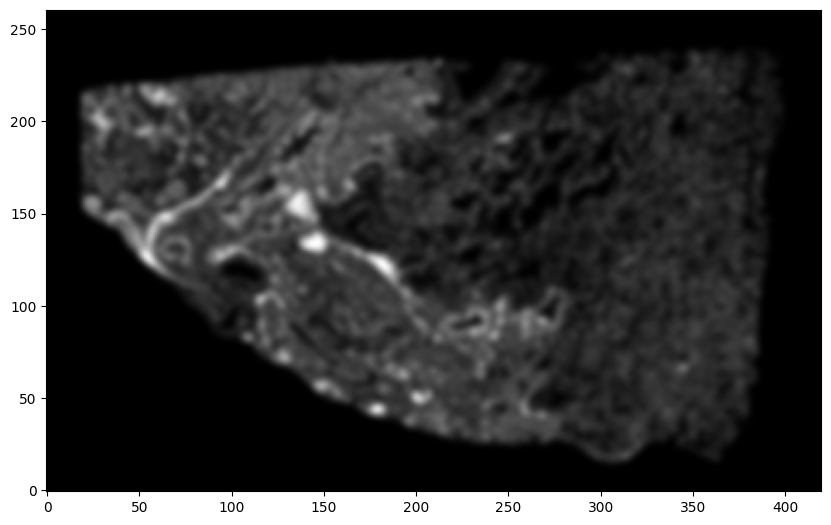

In [5]:
XI,YI,I,fig = STa.rasterize(xI,yI,dx=30)

# plot
ax = fig.axes[0]
ax.invert_yaxis()

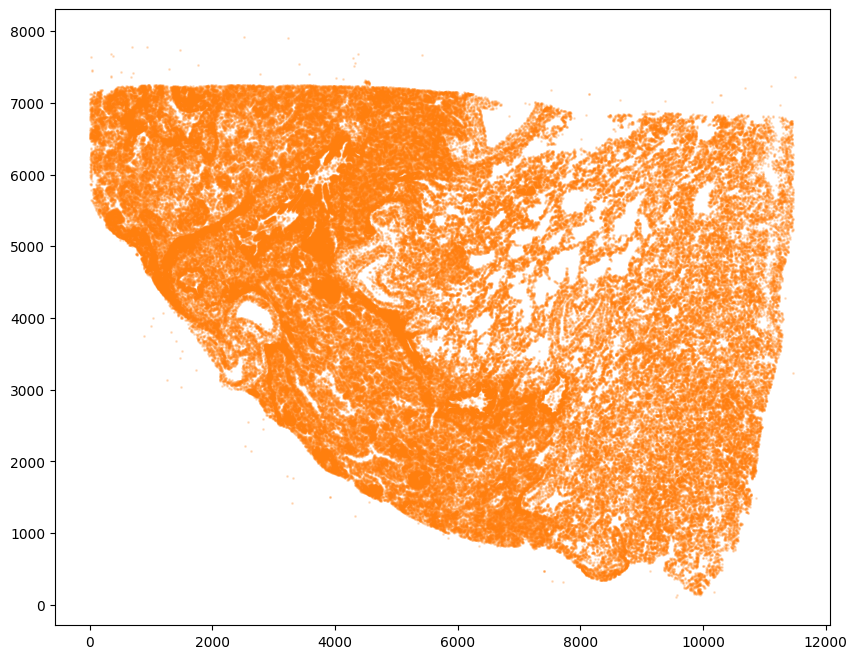

In [6]:
fname = 'cellsv2.csv.gz'
df2 = pd.read_csv(fname)

# get cell centroids
xJ = np.array(df2['x_centroid'])
yJ = np.array(df2['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xJ,yJ,s=1,alpha=0.2,c='#ff7f0e')



0 of 278328
10000 of 278328
20000 of 278328
30000 of 278328
40000 of 278328
50000 of 278328
60000 of 278328
70000 of 278328
80000 of 278328
90000 of 278328
100000 of 278328
110000 of 278328
120000 of 278328
130000 of 278328
140000 of 278328
150000 of 278328
160000 of 278328
170000 of 278328
180000 of 278328
190000 of 278328
200000 of 278328
210000 of 278328
220000 of 278328
230000 of 278328
240000 of 278328
250000 of 278328
260000 of 278328
270000 of 278328
278327 of 278328


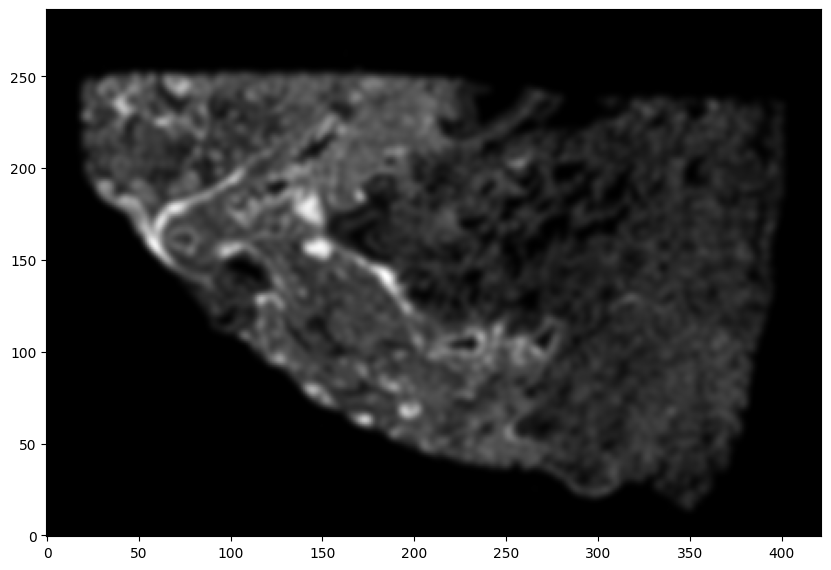

In [7]:
# rasterize and plot
XJ,YJ,J,fig = STa.rasterize(xJ,yJ,dx=30)
ax = fig.axes[0]
ax.invert_yaxis()

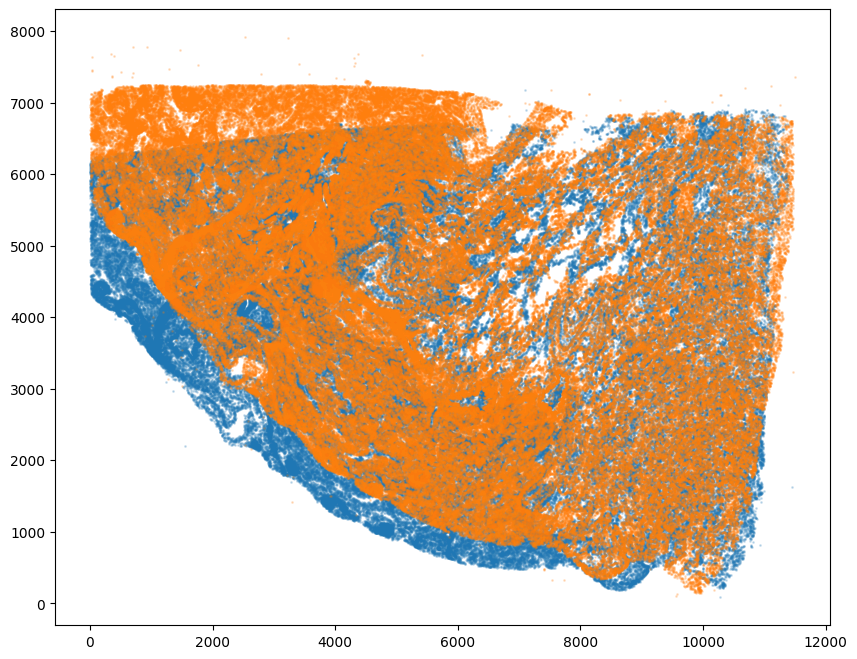

In [10]:
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2,label='source')
ax.scatter(xJ,yJ,s=1,alpha=0.2,label='target')

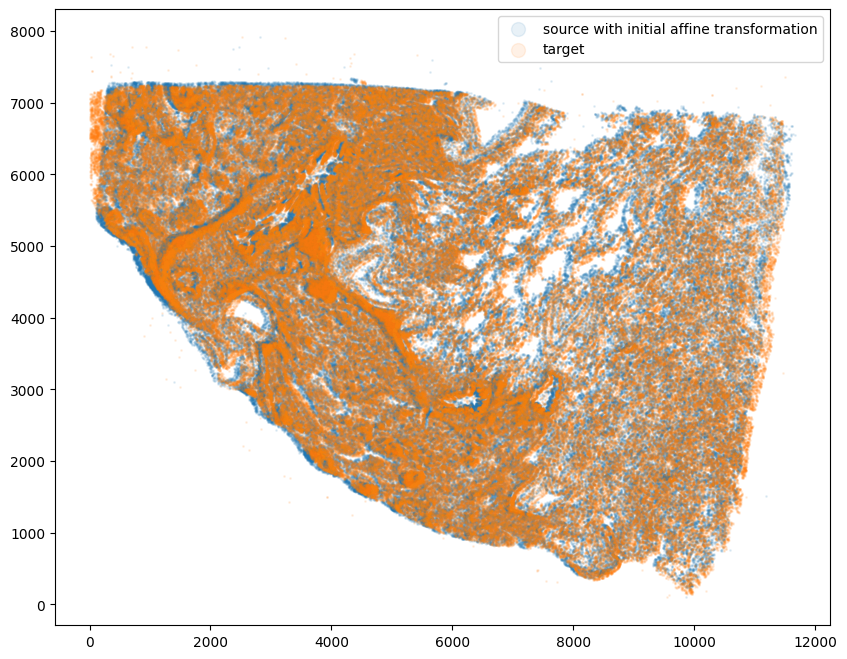

In [14]:
theta_deg = 6
theta0 = (np.pi/180)*-theta_deg

#rotation matrix
#rotates about the origin
L = np.array([[np.cos(theta0),-np.sin(theta0)],
              [np.sin(theta0),np.cos(theta0)]])

source_L = np.matmul(L , np.array([xI, yI]))
xI_L = source_L[0]
yI_L = source_L[1]

#translation matrix
#effectively makes the rotation about the centroid of I (i.e the means of xI and yI])
#and also moves the centroid of I to the centroid of J
T = np.array([ np.mean(xI)- np.cos(theta0)*np.mean(xI) +np.sin(theta0)*np.mean(yI) - (np.mean(xI)-np.mean(xJ)),
              np.mean(yI)- np.sin(theta0)*np.mean(xI) -np.cos(theta0)*np.mean(yI) - (np.mean(yI)-np.mean(yJ))])

xI_L_T = xI_L + T[0]
yI_L_T = yI_L + T[1]


fig,ax = plt.subplots()
ax.scatter(xI_L_T,yI_L_T,s=1,alpha=0.1, label='source with initial affine transformation')
ax.scatter(xJ,yJ,s=1,alpha=0.1, label = 'target')
ax.legend(markerscale = 10)

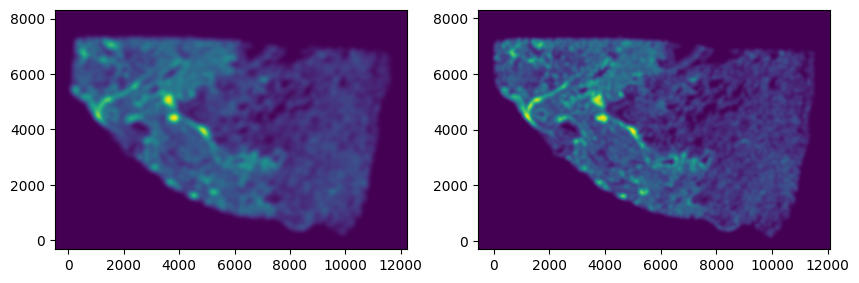

In [16]:
extentI = STa.extent_from_x((YI,XI))
extentJ = STa.extent_from_x((YJ,XJ))

# plot rasterized images
fig,ax = plt.subplots(1,2)
ax[0].imshow(I[0], extent=extentI)
ax[1].imshow(J[0], extent=extentJ)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

/Users/debarpita/Desktop/UGP/trial1/STalign/STalign/STalign.py:1043: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  L = torch.tensor(L,device=device,dtype=dtype,requires_grad=True)
/Users/debarpita/Desktop/UGP/trial1/STalign/STalign/STalign.py:1044: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T = torch.tensor(T,device=device,dtype=dtype,requires_grad=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3638.)
  return _VF.me

CPU times: user 52min 39s, sys: 5min 46s, total: 58min 25s
Wall time: 7min 25s


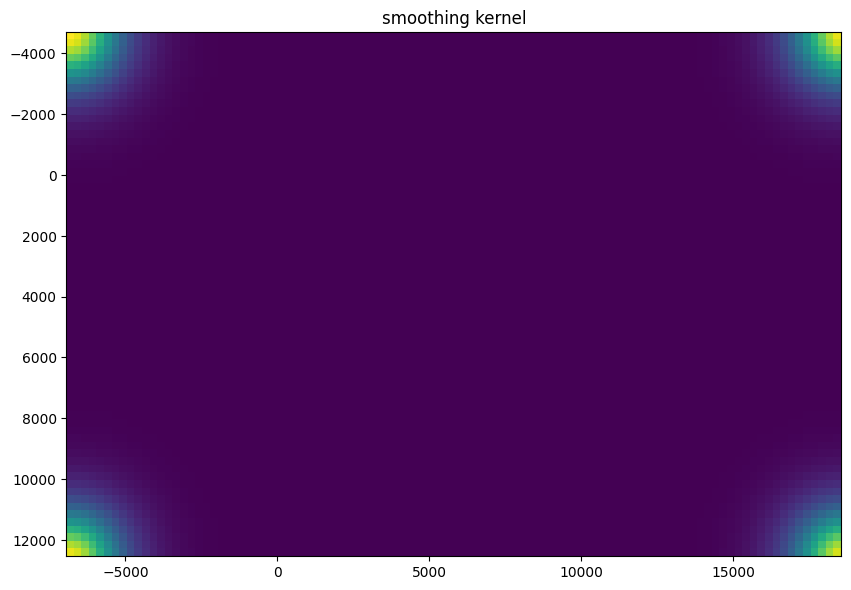

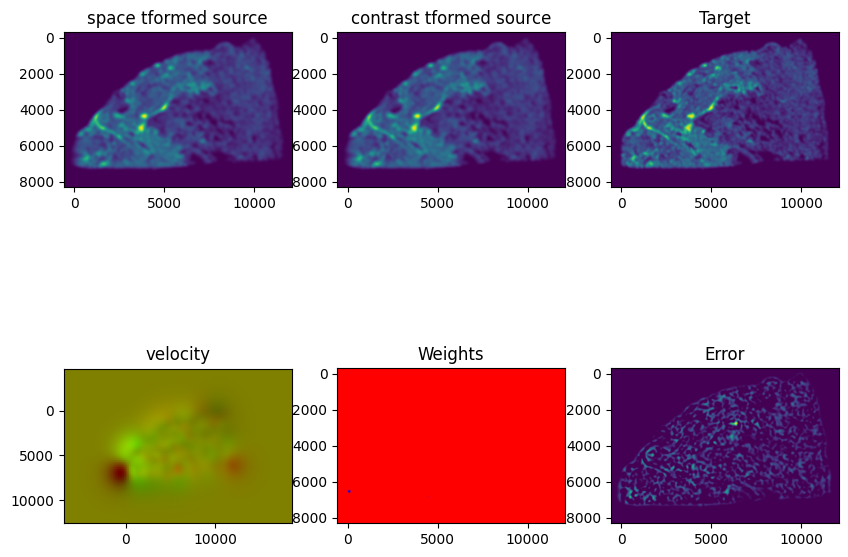

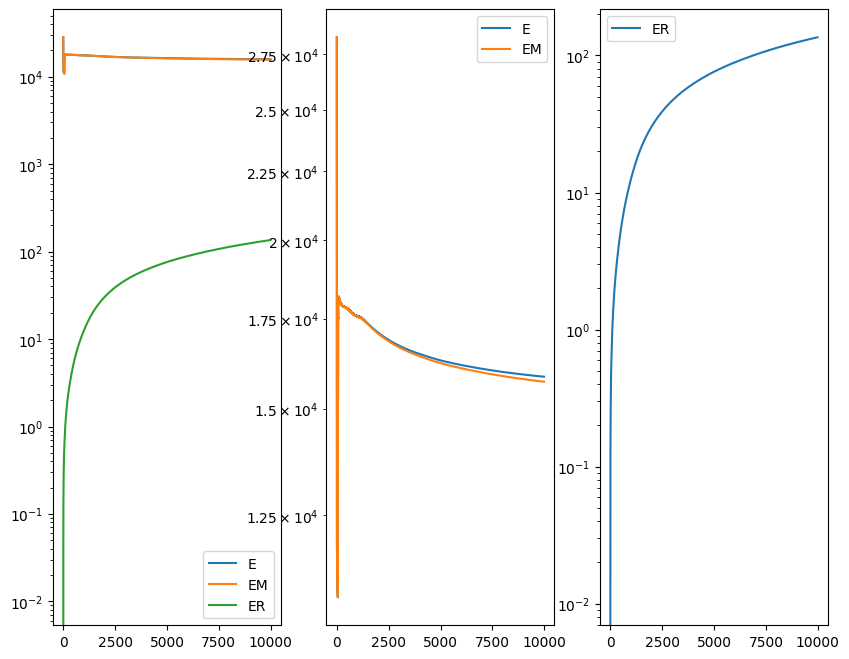

In [17]:
%%time
# run LDDMM
# specify device (default device for STalign.LDDMM is cpu)
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

# keep all other parameters default
params = {
            'niter': 10000,
            'device':device,
            'epV': 50
          }

out = STa.LDDMM([YI,XI],I,[YJ,XJ],J,**params)

In [18]:
# get necessary output variables
A = out['A']
v = out['v']
xv = out['xv']

In [19]:
if torch.cuda.is_available():
    torch.set_default_device('cuda:0')
else:
    torch.set_default_device('cpu')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/utils/_device.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


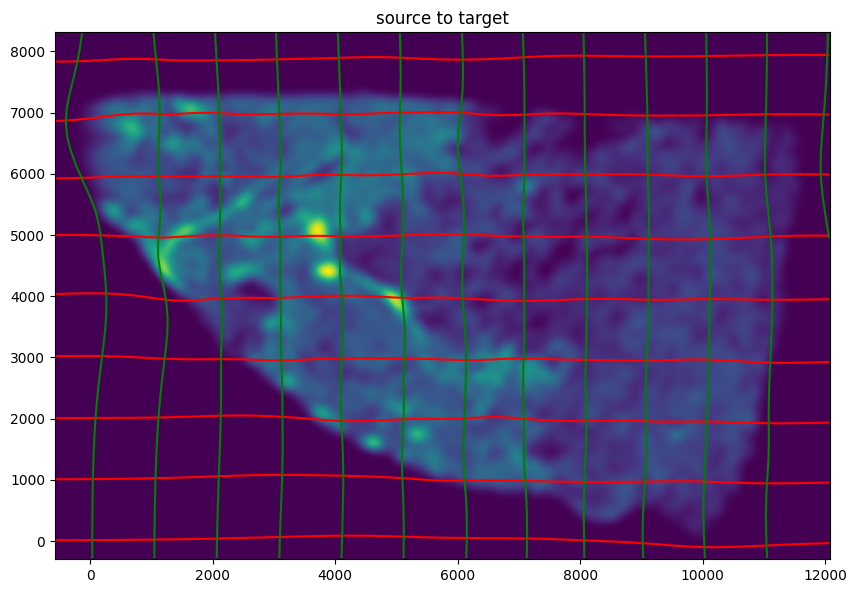

In [20]:
phii = STa.build_transform(xv,v,A,XJ=[YJ,XJ],direction='b')
phiI = STa.transform_image_source_to_target(xv,v,A,[YI,XI],I,[YJ,XJ])

#switch tensor from cuda to cpu for plotting with numpy
if phii.is_cuda:
    phii = phii.cpu()
if phiI.is_cuda:
    phiI = phiI.cpu()

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-100000,100000,1000)
ax.contour(XJ,YJ,phii[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XJ,YJ,phii[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('source to target')
ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ)
ax.invert_yaxis()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/utils/_device.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


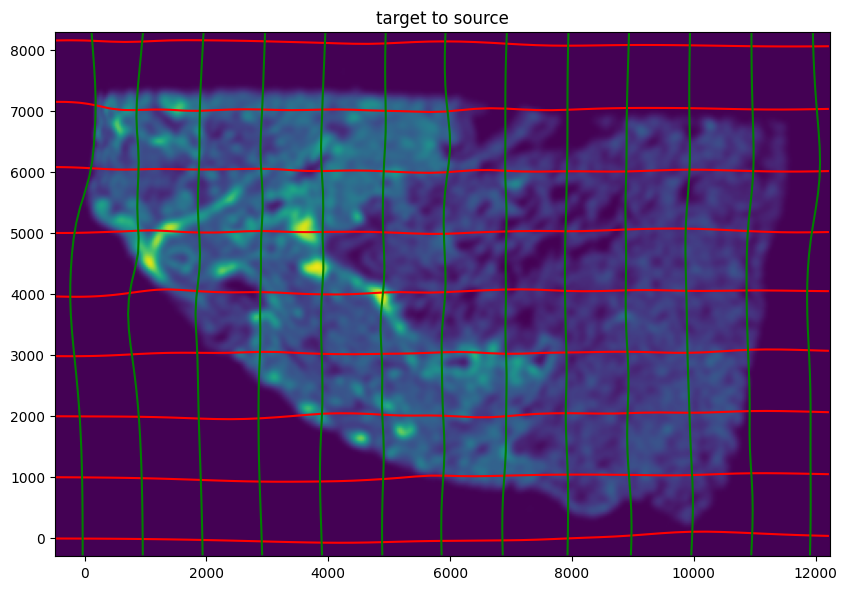

In [22]:
phi = STa.build_transform(xv,v,A,XJ=[YI,XI],direction='f')
phiiJ = STa.transform_image_target_to_source(xv,v,A,[YJ,XJ],J,[YI,XI])

#switch tensor from cuda to cpu for plotting with numpy
if phi.is_cuda:
    phi = phi.cpu()
if phiiJ.is_cuda:
    phiiJ = phiiJ.cpu()

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-100000,100000,1000)
ax.contour(XI,YI,phi[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XI,YI,phi[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('target to source')
ax.imshow(phiiJ.permute(1,2,0)/torch.max(phiiJ),extent=extentI)
ax.invert_yaxis()

In [23]:
tpointsI= STa.transform_points_source_to_target(xv,v,A, np.stack([yI_L_T, xI_L_T], 1))

#switch tensor from cuda to cpu for plotting with numpy
if tpointsI.is_cuda:
    tpointsI = tpointsI.cpu()

#switch from row column coordinates (y,x) to (x,y)
xI_LDDMM = tpointsI[:,1]
yI_LDDMM = tpointsI[:,0]

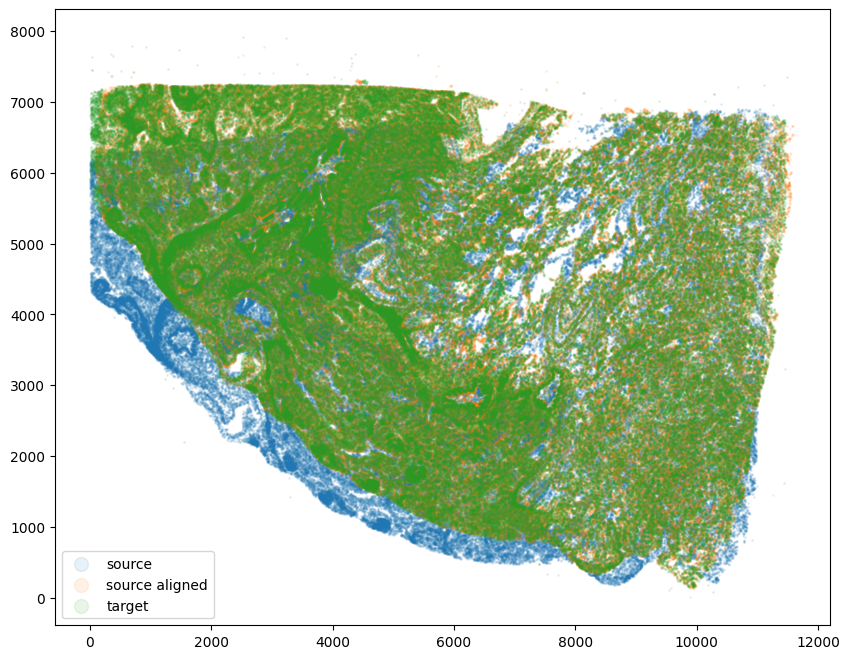

In [24]:
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.1, label='source')
ax.scatter(xI_LDDMM,yI_LDDMM,s=1,alpha=0.1, label = 'source aligned')
ax.scatter(xJ,yJ,s=1,alpha=0.1, label='target')
ax.legend(markerscale = 10)

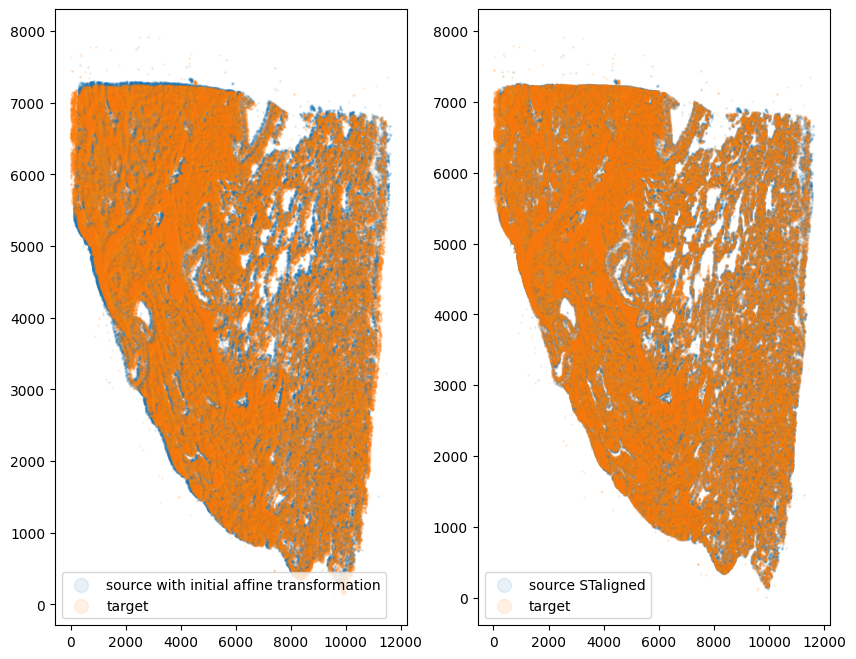

In [25]:
fig,ax = plt.subplots(1,2)
ax[0].scatter(xI_L_T,yI_L_T,s=1,alpha=0.1, label='source with initial affine transformation')
ax[0].scatter(xJ,yJ,s=1,alpha=0.1, label='target')
ax[1].scatter(xI_LDDMM,yI_LDDMM,s=1,alpha=0.1, label = 'source STaligned')
ax[1].scatter(xJ,yJ,s=1,alpha=0.1, label='target')
ax[0].legend(markerscale = 10, loc = 'lower left')
ax[1].legend(markerscale = 10, loc = 'lower left')

In [26]:
df3 = pd.DataFrame(

    {

        "aligned_x": xI_LDDMM,

        "aligned_y": yI_LDDMM,

    },


)

results = pd.concat([df1, df3], axis=1)
results.head()

cell_id  x_centroid   y_centroid  transcript_counts  \
0  aaaadcac-1  315.479584  4135.815918                 35   
1  aaaaieak-1  317.920197  4126.272461                 61   
2  aaaanbhm-1  318.433136  4109.978027                292   
3  aaaankfe-1  335.111847  4116.146484                303   
4  aaaankfi-1  341.734100  4125.354980                 32   

   control_probe_counts  genomic_control_counts  control_codeword_counts  \
0                     0                       0                        0   
1                     0                       0                        0   
2                     0                       0                        0   
3                     1                       0                        0   
4                     0                       0                        0   

   unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
0                           0                           0            35   
1                           0                           0            61   
2                           0                           0           292   
3                           0                           0           304   
4                           0                           0            32   

    cell_area  nucleus_area  nucleus_count  \
0   76.539847      6.863750              1   
1   34.002657     12.688907              1   
2  128.514692     30.028907              1   
3   85.796878     44.975627              1   
4   63.038127     14.540313              1   

                       segmentation_method   aligned_x    aligned_y  
0  Segmented by nucleus expansion of 5.0µm  515.302178  5142.222683  
1  Segmented by nucleus expansion of 5.0µm  517.456751  5133.108630  
2  Segmented by nucleus expansion of 5.0µm  517.638984  5118.037449  
3  Segmented by nucleus expansion of 5.0µm  533.633868  5121.776093  
4  Segmented by nucleus expansion of 5.0µm  540.153140  5129.507021

In [27]:
results.to_csv('aligned.csv.gz',
               compression='gzip')